In [57]:
import requests
import json
import pandas as pd

responses_ = []
dates = pd.date_range(start='1/1/2014', end='11/07/2020')
x = dates.strftime('%Y-%m-%d').tolist()

for date in x:
   rr = requests.get('https://api.sunrise-sunset.org/json?lat=41.7418036&lng=-87.74095358&date={}'.format(date))
   responses_.append(rr.json())

In [59]:
print(len(responses_))

2503


In [62]:
sunrise = []
for x in range(0,2503):
    sunrise.append(responses_[x]['results']['sunrise'])
print(len(sunrise))

2503


In [64]:
sunset = []
for x in range(0,2503):
    sunset.append(responses_[x]['results']['sunset'])
print(len(sunset))

2503


In [68]:
days = pd.date_range(start='1/1/2014', end='11/07/2020')
days_df = pd.DataFrame(days)
days_df.tail()

,0
2498,2020-11-03
2499,2020-11-04
2500,2020-11-05
2501,2020-11-06
2502,2020-11-07


In [241]:
sunrise_df = pd.DataFrame(sunrise)
sunrise_df.head()

,0
0,1:18:10 PM
1,1:18:13 PM
2,1:18:13 PM
3,1:18:12 PM
4,1:18:07 PM


In [273]:
sunset_df = pd.DataFrame(sunset)
sunset_df.head()

,0
0,10:31:33 PM
1,10:32:26 PM
2,10:33:20 PM
3,10:34:16 PM
4,10:35:14 PM


In [274]:
pd.set_option("max_rows", None)
final_sunrise_df = pd.concat([days_df, sunrise_df], axis=1)
final_sunrise_df.columns = ['days','sunrise hours UTC']

final_sunrise_df.dropna(inplace=True)

final_sunrise_df.tail()

,days,sunrise hours UTC
2498,2020-11-03,12:27:02 PM
2499,2020-11-04,12:28:16 PM
2500,2020-11-05,12:29:29 PM
2501,2020-11-06,12:30:42 PM
2502,2020-11-07,12:31:56 PM


In [275]:
final_sunset_df = pd.concat([days_df, sunset_df], axis=1)
final_sunset_df.columns = ['days','sunset hours UTC']

final_sunset_df.dropna(inplace=True)

final_sunset_df.tail()

,days,sunset hours UTC
2498,2020-11-03,10:42:01 PM
2499,2020-11-04,10:40:51 PM
2500,2020-11-05,10:39:43 PM
2501,2020-11-06,10:38:36 PM
2502,2020-11-07,10:37:30 PM


In [276]:
final_daylight = pd.merge(final_sunrise_df, final_sunset_df, how='left', on=['days'])
final_daylight.head()

,days,sunrise hours UTC,sunset hours UTC
0,2014-01-01,1:18:10 PM,10:31:33 PM
1,2014-01-02,1:18:13 PM,10:32:26 PM
2,2014-01-03,1:18:13 PM,10:33:20 PM
3,2014-01-04,1:18:12 PM,10:34:16 PM
4,2014-01-05,1:18:07 PM,10:35:14 PM


In [277]:
#combine days and times into one datetime object
final_daylight['sunrise hours UTC'] = pd.to_datetime(final_daylight['sunrise hours UTC']).dt.strftime('%H:%M:%S')
final_daylight['sunset hours UTC'] = pd.to_datetime(final_daylight['sunset hours UTC']).dt.strftime('%H:%M:%S')

final_daylight['datetime sunrise'] = pd.to_datetime(final_daylight['days'].apply(str)+ ' ' +final_daylight['sunrise hours UTC'])
final_daylight['datetime sunset'] = pd.to_datetime(final_daylight['days'].apply(str)+ ' ' +final_daylight['sunset hours UTC'])

#convert from UTC to Central time
final_daylight['sunrise'] = final_daylight['datetime sunrise'].dt.tz_localize('UTC').dt.tz_convert('US/Central')
final_daylight['sunset'] = final_daylight['datetime sunset'].dt.tz_localize('UTC').dt.tz_convert('US/Central')

final_daylight.head()

,days,sunrise hours UTC,sunset hours UTC,datetime sunrise,datetime sunset,sunrise,sunset
0,2014-01-01,13:18:10,22:31:33,2014-01-01 13:18:10,2014-01-01 22:31:33,2014-01-01 07:18:10-06:00,2014-01-01 16:31:33-06:00
1,2014-01-02,13:18:13,22:32:26,2014-01-02 13:18:13,2014-01-02 22:32:26,2014-01-02 07:18:13-06:00,2014-01-02 16:32:26-06:00
2,2014-01-03,13:18:13,22:33:20,2014-01-03 13:18:13,2014-01-03 22:33:20,2014-01-03 07:18:13-06:00,2014-01-03 16:33:20-06:00
3,2014-01-04,13:18:12,22:34:16,2014-01-04 13:18:12,2014-01-04 22:34:16,2014-01-04 07:18:12-06:00,2014-01-04 16:34:16-06:00
4,2014-01-05,13:18:07,22:35:14,2014-01-05 13:18:07,2014-01-05 22:35:14,2014-01-05 07:18:07-06:00,2014-01-05 16:35:14-06:00


In [278]:
final_daylight_ = final_daylight[['days','sunrise','sunset']]
final_daylight_.head()
final_daylight_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2503 entries, 0 to 2502
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype                     
---  ------   --------------  -----                     
 0   days     2503 non-null   datetime64[ns]            
 1   sunrise  2503 non-null   datetime64[ns, US/Central]
 2   sunset   2503 non-null   datetime64[ns, US/Central]
dtypes: datetime64[ns, US/Central](2), datetime64[ns](1)
memory usage: 78.2 KB


In [280]:
final_daylight_

,days,sunrise,sunset
0,2014-01-01,2014-01-01 07:18:10-06:00,2014-01-01 16:31:33-06:00
1,2014-01-02,2014-01-02 07:18:13-06:00,2014-01-02 16:32:26-06:00
2,2014-01-03,2014-01-03 07:18:13-06:00,2014-01-03 16:33:20-06:00
3,2014-01-04,2014-01-04 07:18:12-06:00,2014-01-04 16:34:16-06:00
4,2014-01-05,2014-01-05 07:18:07-06:00,2014-01-05 16:35:14-06:00
5,2014-01-06,2014-01-06 07:18:01-06:00,2014-01-06 16:36:13-06:00
6,2014-01-07,2014-01-07 07:17:52-06:00,2014-01-07 16:37:13-06:00
7,2014-01-08,2014-01-08 07:17:41-06:00,2014-01-08 16:38:14-06:00
8,2014-01-09,2014-01-09 07:17:27-06:00,2014-01-09 16:39:17-06:00
9,2014-01-10,2014-01-10 07:17:11-06:00,2014-01-10 16:40:21-06:00


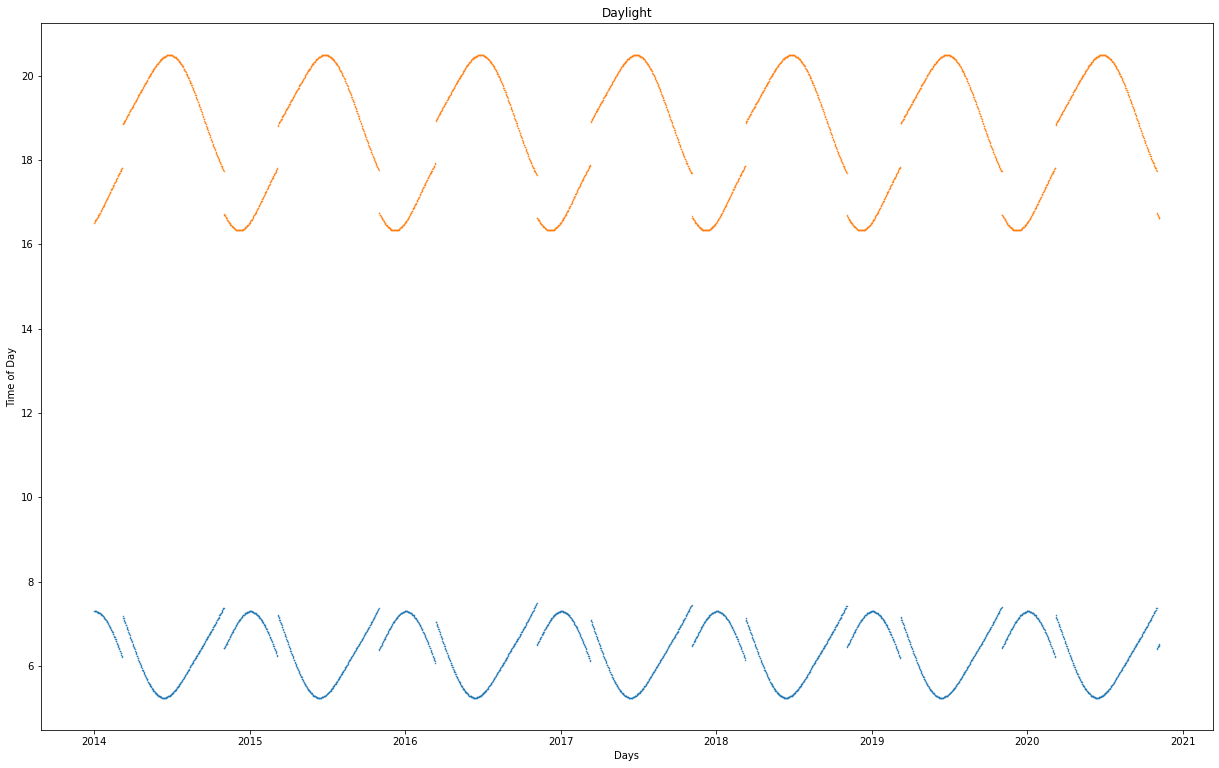

In [330]:
import matplotlib.pyplot as plt

plt.figure(figsize=(21,13))

plt.scatter(final_daylight_['days'],final_daylight_['sunrise'].dt.hour+((final_daylight_['sunrise'].dt.minute)/(60)),s=0.25)
plt.scatter(final_daylight_['days'],final_daylight_['sunset'].dt.hour+((final_daylight_['sunset'].dt.minute)/(60)),s=0.25)

plt.title('Daylight')
plt.xlabel('Days')
plt.ylabel('Time of Day')
plt.show()

In [331]:
import pickle

with open('daylight_dataframe.pkl', 'wb') as fp:
    pickle.dump(final_daylight_, fp)

In [268]:
with open ('daylight_dataframe.pkl', 'rb') as fp:
    daylight_dataframe = pickle.load(fp)

In [334]:
final_daylight_.to_pickle("final_daylight.pkl")